In [2]:
import pandas as pd
import polars as pl

In [3]:
# chunk_size = 100000  # Number of rows per chunk
df = pl.read_csv('US_Accidents_March23.csv') #, chunksize = chunk_size)

In [4]:
df.head(5)

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
str,str,i64,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,null,null,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""","""2016-02-08 05:58:00""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,null,null,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""","""2016-02-08 05:51:00""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Night""","""Night""","""Day"""
"""A-3""","""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,null,null,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""","""2016-02-08 06:56:00""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Night""","""Night""","""Day""","""Day"""
"""A-4""","""Source2""",3,"""2016-02-08 07:23:34""","""2016-02-08 07:53:34""",39.747753,-84.205582,null,null,0.01,"""Accident on I-75 Southbound at…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US""","""US/Eastern""","""KDAY""","""2016-02-08 07:38:00""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,false,false,"""Night""","""Day""","""Day""","""Day"""
"""A-5""","""Source2""",2,"""2016-02-08 07:39:07""","""2016-02-08 08:09:07""",39.627781,-84.188354,null,null,0.01,"""Accident on McEwen Rd at OH-72…","""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US""","""US/Eastern""","""KMGY""","""2016-02-08 07:53:00""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,null,"""Mostly Cloudy""",false,false,false,false,false,false,false,false,false,false,false,true,false,"""Day""","""Day""","""Day""","""Day"""


In [5]:
df.height

7728394

In [6]:
df.width

46

In [7]:
df.columns

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [8]:
#Checking how many values are false in the boolean columns
cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']
false_counts = df.select([(pl.col(col) == False).sum().alias(col) for col in cols])
for col in cols:
    print(f"False entries in {col} : {false_counts[0, col]}")

False entries in Amenity : 7632060
False entries in Bump : 7724880
False entries in Crossing : 6854631
False entries in Give_Way : 7691812
False entries in Junction : 7157052
False entries in No_Exit : 7708849
False entries in Railway : 7661415
False entries in Roundabout : 7728145
False entries in Station : 7526493
False entries in Stop : 7514023
False entries in Traffic_Calming : 7720796
False entries in Traffic_Signal : 6584622
False entries in Turning_Loop : 7728394


In [9]:
#The 10 columns that are almost entirely false and thus not useful
df_drop = df.drop(['Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'])
df_drop.width

36

In [10]:
#Just a couple of extra columns that do not give us enough information on their own to warrant staying.
#Closely associated with Sunset, so they will not add to our analysis
df_drop = df_drop.drop(['Nautical_Twilight','Astronomical_Twilight', 'Civil_Twilight'])

In [11]:
df_drop.width

33

In [12]:
df_drop.columns

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Crossing',
 'Junction',
 'Traffic_Signal',
 'Sunrise_Sunset']

In [13]:
cols = ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street',
        'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)'
        , 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing', 'Junction',
        'Traffic_Signal', 'Sunrise_Sunset']

for col in cols:
    null_count = df_drop.select(pl.col(col).null_count())[0, 0]  # Get the count of nulls in the column
    print(f"Null entries in {col} : {null_count}")

Null entries in ID : 0
Null entries in Source : 0
Null entries in Severity : 0
Null entries in Start_Time : 0
Null entries in End_Time : 0
Null entries in Start_Lat : 0
Null entries in Start_Lng : 0
Null entries in End_Lat : 3402762
Null entries in End_Lng : 3402762
Null entries in Distance(mi) : 0
Null entries in Description : 5
Null entries in Street : 10869
Null entries in City : 253
Null entries in County : 0
Null entries in State : 0
Null entries in Zipcode : 1915
Null entries in Country : 0
Null entries in Timezone : 7808
Null entries in Airport_Code : 22635
Null entries in Weather_Timestamp : 120228
Null entries in Temperature(F) : 163853
Null entries in Wind_Chill(F) : 1999019
Null entries in Humidity(%) : 174144
Null entries in Pressure(in) : 140679
Null entries in Visibility(mi) : 177098
Null entries in Wind_Direction : 175206
Null entries in Wind_Speed(mph) : 571233
Null entries in Precipitation(in) : 2203586
Null entries in Weather_Condition : 173459
Null entries in Crossin

In [14]:
df_drop = df_drop.drop(['End_Lat','End_Lng']) #since majority of the values are null and these columns are insignificant

In [15]:
df_drop.width

31

In [16]:
bool_cols = ['Junction', 'Crossing', 'Traffic_Signal']
df_drop = df_drop.with_columns([pl.col(col).cast(pl.Int32).alias(col) for col in bool_cols])

In [17]:
df_drop.head(3)

ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
str,str,i64,str,str,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str
"""A-1""","""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US""","""US/Eastern""","""KFFO""","""2016-02-08 05:58:00""",36.9,null,91.0,29.68,10.0,"""Calm""",null,0.02,"""Light Rain""",0,0,0,"""Night"""
"""A-2""","""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US""","""US/Eastern""","""KCMH""","""2016-02-08 05:51:00""",37.9,null,100.0,29.65,10.0,"""Calm""",null,0.0,"""Light Rain""",0,0,0,"""Night"""
"""A-3""","""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US""","""US/Eastern""","""KI69""","""2016-02-08 06:56:00""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,null,"""Overcast""",0,0,1,"""Night"""


In [18]:
for col in df_drop.columns:
    unique_count = df_drop.select(pl.col(col).n_unique())[0, 0]
    print(f"Unique entries in {col} : {unique_count}")

Unique entries in ID : 7728394
Unique entries in Source : 3
Unique entries in Severity : 4
Unique entries in Start_Time : 6131796
Unique entries in End_Time : 6705355
Unique entries in Start_Lat : 2449172
Unique entries in Start_Lng : 2493905
Unique entries in Distance(mi) : 22382
Unique entries in Description : 3761579
Unique entries in Street : 336307
Unique entries in City : 13679
Unique entries in County : 1871
Unique entries in State : 49
Unique entries in Zipcode : 825095
Unique entries in Country : 1
Unique entries in Timezone : 5
Unique entries in Airport_Code : 2046
Unique entries in Weather_Timestamp : 941332
Unique entries in Temperature(F) : 861
Unique entries in Wind_Chill(F) : 1002
Unique entries in Humidity(%) : 101
Unique entries in Pressure(in) : 1145
Unique entries in Visibility(mi) : 93
Unique entries in Wind_Direction : 25
Unique entries in Wind_Speed(mph) : 185
Unique entries in Precipitation(in) : 300
Unique entries in Weather_Condition : 145
Unique entries in Cro

In [19]:
df_drop = df_drop.drop(['Country']) #This is a uniform column displaying just the 'US'

In [20]:
df_drop.width

30

In [21]:
df_drop = df_drop.drop(['Airport_Code','ID']) #not useful in our context

In [22]:
df_drop.width

28

In [23]:
df_drop = df_drop.drop(['Weather_Timestamp']) #This relates to what time the weather data was recorded, so irrelevant to us

In [24]:
df_drop.columns

['Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Crossing',
 'Junction',
 'Traffic_Signal',
 'Sunrise_Sunset']

In [25]:
# List of columns to fill null values with mean
cols_to_fill = ['Wind_Chill(F)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)']

# Fill null values with the mean of the column
df_drop = df_drop.with_columns([pl.col(col).fill_null(pl.col(col).mean()).alias(col) for col in cols_to_fill])
df_drop.head(10)

Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
str,i64,str,str,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str
"""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""Calm""",7.68549,0.02,"""Light Rain""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""Calm""",7.68549,0.0,"""Light Rain""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,"""Overcast""",0,0,1,"""Night"""
"""Source2""",3,"""2016-02-08 07:23:34""","""2016-02-08 07:53:34""",39.747753,-84.205582,0.01,"""Accident on I-75 Southbound at…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US/Eastern""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,0.008407,"""Mostly Cloudy""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 07:39:07""","""2016-02-08 08:09:07""",39.627781,-84.188354,0.01,"""Accident on McEwen Rd at OH-72…","""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US/Eastern""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,0.008407,"""Mostly Cloudy""",0,0,1,"""Day"""
"""Source2""",3,"""2016-02-08 07:44:26""","""2016-02-08 08:14:26""",40.10059,-82.925194,0.01,"""Accident on I-270 Outerbelt No…","""Westerville Rd""","""Westerville""","""Franklin""","""OH""","""43081""","""US/Eastern""",37.9,35.5,97.0,29.63,7.0,"""SSW""",3.5,0.03,"""Light Rain""",0,0,0,"""Day"""
"""Source2""",2,"""2016-02-08 07:59:35""","""2016-02-08 08:29:35""",39.758274,-84.230507,0.0,"""Accident on Oakridge Dr at Woo…","""N Woodward Ave""","""Dayton""","""Montgomery""","""OH""","""45417-2476""","""US/Eastern""",34.0,31.0,100.0,29.66,7.0,"""WSW""",3.5,0.008407,"""Overcast""",0,0,0,"""Day"""
"""Source2""",3,"""2016-02-08 07:59:58""","""2016-02-08 08:29:58""",39.770382,-84.194901,0.01,"""Accident on I-75 Southbound at…","""N Main St""","""Dayton""","""Montgomery""","""OH""","""45405""","""US/Eastern""",34.0,31.0,100.0,29.66,7.0,"""WSW""",3.5,0.008407,"""Overcast""",0,0,0,"""Day"""
"""Source2""",2,"""2016-02-08 08:00:40""","""2016-02-08 08:30:40""",39.778061,-84.172005,0.0,"""Accident on Notre Dame Ave at …","""Notre Dame Ave""","""Dayton""","""Montgomery""","""OH""","""45404-1923""","""US/Eastern""",33.3,58.251048,99.0,29.67,5.0,"""SW""",1.2,0.008407,"""Mostly Cloudy""",0,0,0,"""Day"""


In [26]:
cols = ['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street','City', 'County', 'State',
        'Zipcode', 'Timezone', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
        'Precipitation(in)', 'Weather_Condition', 'Crossing', 'Junction','Traffic_Signal', 'Sunrise_Sunset']
for col in cols:
    null_count = df_drop.select(pl.col(col).null_count())[0, 0]  # Get the count of nulls in the column
    print(f"Null entries in {col} : {null_count}")

Null entries in Source : 0
Null entries in Severity : 0
Null entries in Start_Time : 0
Null entries in End_Time : 0
Null entries in Start_Lat : 0
Null entries in Start_Lng : 0
Null entries in Distance(mi) : 0
Null entries in Description : 5
Null entries in Street : 10869
Null entries in City : 253
Null entries in County : 0
Null entries in State : 0
Null entries in Zipcode : 1915
Null entries in Timezone : 7808
Null entries in Temperature(F) : 0
Null entries in Wind_Chill(F) : 0
Null entries in Humidity(%) : 0
Null entries in Pressure(in) : 0
Null entries in Visibility(mi) : 0
Null entries in Wind_Direction : 175206
Null entries in Wind_Speed(mph) : 0
Null entries in Precipitation(in) : 0
Null entries in Weather_Condition : 173459
Null entries in Crossing : 0
Null entries in Junction : 0
Null entries in Traffic_Signal : 0
Null entries in Sunrise_Sunset : 23246


In [27]:
df_drop.head(3)

Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset
str,i64,str,str,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str
"""Source2""",3,"""2016-02-08 05:46:00""","""2016-02-08 11:00:00""",39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""Calm""",7.68549,0.02,"""Light Rain""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 06:07:59""","""2016-02-08 06:37:59""",39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""Calm""",7.68549,0.0,"""Light Rain""",0,0,0,"""Night"""
"""Source2""",2,"""2016-02-08 06:49:27""","""2016-02-08 07:19:27""",39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,"""Overcast""",0,0,1,"""Night"""


In [28]:
# Step 1: Clean the datetime strings to remove fractional seconds
df_drop = df_drop.with_columns([
    pl.col('Start_Time').str.replace(r'\.\d+', '').alias('Start_Time'),  # Remove anything after the seconds
    pl.col('End_Time').str.replace(r'\.\d+', '').alias('End_Time')      # Remove anything after the seconds
])

# Step 2: Identify invalid datetime entries (optional but useful for debugging)
invalid_start = df_drop.filter(~pl.col('Start_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=True).is_not_null())
invalid_end = df_drop.filter(~pl.col('End_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=True).is_not_null())

print("Invalid Start_Time entries:")
print(invalid_start)

print("Invalid End_Time entries:")
print(invalid_end)

# Step 3: Convert the cleaned time data into workable DateTime objects with strict=False
df_drop = df_drop.with_columns([
    pl.col('Start_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=False).alias('Start_Time'),
    pl.col('End_Time').str.strptime(pl.Datetime, '%Y-%m-%d %H:%M:%S', strict=False).alias('End_Time')
])

# Breaking the start time into usable independent features
df_drop = df_drop.with_columns([
    pl.col('Start_Time').dt.year().alias('Year'),
    pl.col('Start_Time').dt.month().alias('Month'),
    pl.col('Start_Time').dt.day().alias('Day'),
    pl.col('Start_Time').dt.hour().alias('Time_S'),
    pl.col('Start_Time').dt.weekday().alias('Weekday'),
    (pl.col('End_Time') - pl.col('Start_Time')).dt.total_seconds().alias('Duration')
])

# Drop the original Start_Time and End_Time columns
df_drop = df_drop.drop(['Start_Time', 'End_Time'])

Invalid Start_Time entries:
shape: (0, 27)
┌────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬──────────────┬─────────────┐
│ Source ┆ Severity ┆ Start_Time ┆ End_Time ┆ … ┆ Crossing ┆ Junction ┆ Traffic_Sign ┆ Sunrise_Sun │
│ ---    ┆ ---      ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ al           ┆ set         │
│ str    ┆ i64      ┆ str        ┆ str      ┆   ┆ i32      ┆ i32      ┆ ---          ┆ ---         │
│        ┆          ┆            ┆          ┆   ┆          ┆          ┆ i32          ┆ str         │
╞════════╪══════════╪════════════╪══════════╪═══╪══════════╪══════════╪══════════════╪═════════════╡
└────────┴──────────┴────────────┴──────────┴───┴──────────┴──────────┴──────────────┴─────────────┘
Invalid End_Time entries:
shape: (0, 27)
┌────────┬──────────┬────────────┬──────────┬───┬──────────┬──────────┬──────────────┬─────────────┐
│ Source ┆ Severity ┆ Start_Time ┆ End_Time ┆ … ┆ Crossing ┆ Junction ┆ Traffic_Sign ┆ Sunrise_Sun │
│ ---  

In [29]:
df_drop.head(15)

Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,Duration
str,i64,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str,i32,i8,i8,i8,i8,i64
"""Source2""",3,39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""Calm""",7.68549,0.02,"""Light Rain""",0,0,0,"""Night""",2016,2,8,5,1,18840
"""Source2""",2,39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""Calm""",7.68549,0.0,"""Light Rain""",0,0,0,"""Night""",2016,2,8,6,1,1800
"""Source2""",2,39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,"""Overcast""",0,0,1,"""Night""",2016,2,8,6,1,1800
"""Source2""",3,39.747753,-84.205582,0.01,"""Accident on I-75 Southbound at…","""I-75 S""","""Dayton""","""Montgomery""","""OH""","""45417""","""US/Eastern""",35.1,31.0,96.0,29.64,9.0,"""SW""",4.6,0.008407,"""Mostly Cloudy""",0,0,0,"""Night""",2016,2,8,7,1,1800
"""Source2""",2,39.627781,-84.188354,0.01,"""Accident on McEwen Rd at OH-72…","""Miamisburg Centerville Rd""","""Dayton""","""Montgomery""","""OH""","""45459""","""US/Eastern""",36.0,33.3,89.0,29.65,6.0,"""SW""",3.5,0.008407,"""Mostly Cloudy""",0,0,1,"""Day""",2016,2,8,7,1,1800
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Source2""",3,39.952812,-83.119293,0.01,"""Accident on I-270 Outerbelt No…","""Outerbelt S""","""Columbus""","""Franklin""","""OH""","""43228""","""US/Eastern""",35.6,30.7,93.0,29.64,5.0,"""WNW""",5.8,0.008407,"""Rain""",1,1,0,"""Day""",2016,2,8,8,1,1800
"""Source2""",3,39.932709,-82.83091,0.01,"""One lane blocked due to accide…","""I-70 E""","""Reynoldsburg""","""Franklin""","""OH""","""43068""","""US/Eastern""",37.4,33.8,100.0,29.62,3.0,"""SSW""",4.6,0.02,"""Light Rain""",0,0,0,"""Day""",2016,2,8,8,1,1800
"""Source2""",2,39.737633,-84.149933,0.0,"""Accident on Revere Ave at Wate…","""Watervliet Ave""","""Dayton""","""Montgomery""","""OH""","""45420-1863""","""US/Eastern""",33.8,58.251048,100.0,29.63,3.0,"""SW""",2.3,0.008407,"""Overcast""",0,0,0,"""Day""",2016,2,8,8,1,1800


In [30]:
cols = ['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street','City', 'County', 'State', 'Zipcode', 'Timezone',
        'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)',
        'Weather_Condition', 'Crossing', 'Junction','Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Time_S', 'Weekday', 'Duration']
for col in cols:
    null_count = df_drop.select(pl.col(col).null_count())[0, 0]  # Get the count of nulls in the column
    print(f"Null entries in {col} : {null_count}")

Null entries in Source : 0
Null entries in Severity : 0
Null entries in Start_Lat : 0
Null entries in Start_Lng : 0
Null entries in Distance(mi) : 0
Null entries in Description : 5
Null entries in Street : 10869
Null entries in City : 253
Null entries in County : 0
Null entries in State : 0
Null entries in Zipcode : 1915
Null entries in Timezone : 7808
Null entries in Temperature(F) : 0
Null entries in Wind_Chill(F) : 0
Null entries in Humidity(%) : 0
Null entries in Pressure(in) : 0
Null entries in Visibility(mi) : 0
Null entries in Wind_Direction : 175206
Null entries in Wind_Speed(mph) : 0
Null entries in Precipitation(in) : 0
Null entries in Weather_Condition : 173459
Null entries in Crossing : 0
Null entries in Junction : 0
Null entries in Traffic_Signal : 0
Null entries in Sunrise_Sunset : 23246
Null entries in Year : 0
Null entries in Month : 0
Null entries in Day : 0
Null entries in Time_S : 0
Null entries in Weekday : 0
Null entries in Duration : 0


In [31]:
df_drop.width

31

In [32]:
df_drop.height

7728394

In [33]:
# Filtering out rows where 'Weather_Condition' or 'Wind_Direction' are null
df_drop = df_drop.filter(~pl.col('Weather_Condition').is_null() | ~pl.col('Wind_Direction').is_null())

In [34]:
df_drop.height

7593604

In [35]:
unique_values = df_drop["Wind_Direction"].unique()
print(unique_values.to_list())

['Calm', 'N', 'WNW', None, 'S', 'NNE', 'ESE', 'WSW', 'NE', 'NW', 'W', 'North', 'Variable', 'SSW', 'ENE', 'E', 'East', 'SSE', 'SW', 'SE', 'South', 'NNW', 'West', 'CALM', 'VAR']


In [36]:
df_drop.head(3)

Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,Duration
str,i64,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str,i32,i8,i8,i8,i8,i64
"""Source2""",3,39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""Calm""",7.68549,0.02,"""Light Rain""",0,0,0,"""Night""",2016,2,8,5,1,18840
"""Source2""",2,39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""Calm""",7.68549,0.0,"""Light Rain""",0,0,0,"""Night""",2016,2,8,6,1,1800
"""Source2""",2,39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,"""Overcast""",0,0,1,"""Night""",2016,2,8,6,1,1800


In [37]:
#as we can see S means the same as South and N means the same as North and so on, hence cleaning this up
df_drop = df_drop.with_columns(
    pl.when(pl.col('Wind_Direction') == 'Calm').then(pl.lit('CALM'))
    .when(pl.col('Wind_Direction') == 'North').then(pl.lit('N'))
    .when(pl.col('Wind_Direction') == 'South').then(pl.lit('S'))
    .when(pl.col('Wind_Direction') == 'East').then(pl.lit('E'))
    .when(pl.col('Wind_Direction') == 'West').then(pl.lit('W'))
    .when(pl.col('Wind_Direction') == 'Variable').then(pl.lit('VAR'))
    .otherwise(pl.col('Wind_Direction'))  # Retain original value if no match
    .alias('Wind_Direction')  # Rename back to 'Wind_Direction'
)

In [38]:
unique_values = df_drop["Wind_Direction"].unique()
print(unique_values.to_list())

['E', None, 'ESE', 'NE', 'SW', 'WNW', 'W', 'SE', 'VAR', 'CALM', 'NNW', 'N', 'S', 'SSE', 'SSW', 'ENE', 'NW', 'WSW', 'NNE']


In [39]:
# Binning Time of Day
df_drop = df_drop.with_columns(
    pl.when(pl.col('Time_S').lt(6)).then(pl.lit('Early Morning'))
    .when(pl.col('Time_S').lt(12)).then(pl.lit('Morning'))
    .when(pl.col('Time_S').lt(18)).then(pl.lit('Afternoon'))
    .when(pl.col('Time_S').lt(24)).then(pl.lit('Evening'))
    .otherwise(pl.lit('Unknown')).alias('TimeofDay')
)

In [40]:
result = df_drop.filter(pl.col('TimeofDay') == 'Unknown')
print(result)

shape: (0, 32)
┌────────┬──────────┬───────────┬───────────┬───┬────────┬─────────┬──────────┬───────────┐
│ Source ┆ Severity ┆ Start_Lat ┆ Start_Lng ┆ … ┆ Time_S ┆ Weekday ┆ Duration ┆ TimeofDay │
│ ---    ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---    ┆ ---     ┆ ---      ┆ ---       │
│ str    ┆ i64      ┆ f64       ┆ f64       ┆   ┆ i8     ┆ i8      ┆ i64      ┆ str       │
╞════════╪══════════╪═══════════╪═══════════╪═══╪════════╪═════════╪══════════╪═══════════╡
└────────┴──────────┴───────────┴───────────┴───┴────────┴─────────┴──────────┴───────────┘


In [41]:
# Binning Seasons
df_drop = df_drop.with_columns(
    pl.when(pl.col('Month').is_in([12, 1, 2])).then(pl.lit('Winter'))
    .when(pl.col('Month').is_in([3, 4, 5])).then(pl.lit('Spring'))
    .when(pl.col('Month').is_in([6, 7, 8])).then(pl.lit('Summer'))
    .when(pl.col('Month').is_in([9, 10, 11])).then(pl.lit('Autumn'))
    .otherwise(pl.lit('Unknown')).alias('Season')
)

In [42]:
result = df_drop.filter(pl.col('Season') == 'Unknown')
print(result)

shape: (0, 33)
┌────────┬──────────┬───────────┬───────────┬───┬─────────┬──────────┬───────────┬────────┐
│ Source ┆ Severity ┆ Start_Lat ┆ Start_Lng ┆ … ┆ Weekday ┆ Duration ┆ TimeofDay ┆ Season │
│ ---    ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---     ┆ ---      ┆ ---       ┆ ---    │
│ str    ┆ i64      ┆ f64       ┆ f64       ┆   ┆ i8      ┆ i64      ┆ str       ┆ str    │
╞════════╪══════════╪═══════════╪═══════════╪═══╪═════════╪══════════╪═══════════╪════════╡
└────────┴──────────┴───────────┴───────────┴───┴─────────┴──────────┴───────────┴────────┘


In [43]:
df_drop.head(3)

Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,Duration,TimeofDay,Season
str,i64,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,str,i32,i32,i32,str,i32,i8,i8,i8,i8,i64,str,str
"""Source2""",3,39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""CALM""",7.68549,0.02,"""Light Rain""",0,0,0,"""Night""",2016,2,8,5,1,18840,"""Early Morning""","""Winter"""
"""Source2""",2,39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""CALM""",7.68549,0.0,"""Light Rain""",0,0,0,"""Night""",2016,2,8,6,1,1800,"""Morning""","""Winter"""
"""Source2""",2,39.063148,-84.032608,0.01,"""Accident on OH-32 State Route …","""State Route 32""","""Williamsburg""","""Clermont""","""OH""","""45176""","""US/Eastern""",36.0,33.3,100.0,29.67,10.0,"""SW""",3.5,0.008407,"""Overcast""",0,0,1,"""Night""",2016,2,8,6,1,1800,"""Morning""","""Winter"""


In [44]:
result = df_drop.filter(pl.col('Weekday') == 7)
print(result)

shape: (546_184, 33)
┌─────────┬──────────┬───────────┬─────────────┬───┬─────────┬──────────┬───────────┬────────┐
│ Source  ┆ Severity ┆ Start_Lat ┆ Start_Lng   ┆ … ┆ Weekday ┆ Duration ┆ TimeofDay ┆ Season │
│ ---     ┆ ---      ┆ ---       ┆ ---         ┆   ┆ ---     ┆ ---      ┆ ---       ┆ ---    │
│ str     ┆ i64      ┆ f64       ┆ f64         ┆   ┆ i8      ┆ i64      ┆ str       ┆ str    │
╞═════════╪══════════╪═══════════╪═════════════╪═══╪═════════╪══════════╪═══════════╪════════╡
│ Source2 ┆ 3        ┆ 39.981709 ┆ -82.98436   ┆ … ┆ 7       ┆ 49560    ┆ Morning   ┆ Winter │
│ Source2 ┆ 3        ┆ 39.953022 ┆ -82.998894  ┆ … ┆ 7       ┆ 1800     ┆ Morning   ┆ Winter │
│ Source2 ┆ 3        ┆ 39.973812 ┆ -82.983162  ┆ … ┆ 7       ┆ 1800     ┆ Morning   ┆ Winter │
│ Source2 ┆ 3        ┆ 39.978306 ┆ -82.852554  ┆ … ┆ 7       ┆ 4477     ┆ Evening   ┆ Winter │
│ Source2 ┆ 3        ┆ 39.917412 ┆ -83.014236  ┆ … ┆ 7       ┆ 4379     ┆ Evening   ┆ Winter │
│ …       ┆ …        ┆ …     

In [45]:
# Binning Day Type
df_drop = df_drop.with_columns(
    pl.when(pl.col('Weekday').is_in([1, 2, 3, 4])).then(pl.lit('Weekday'))
    .when(pl.col('Weekday').is_in([5, 6, 7])).then(pl.lit('Weekend'))
    .otherwise(pl.lit('Unknown')).alias('Day_Type')
)

In [46]:
unique_values = df_drop["Sunrise_Sunset"].unique()
print(unique_values.to_list())

['Day', None, 'Night']


In [47]:
df_drop = df_drop.with_columns(
    pl.when(pl.col('Sunrise_Sunset') == 'Night').then(0)
    .when(pl.col('Sunrise_Sunset') == 'Day').then(1)
    .otherwise(pl.col('Sunrise_Sunset'))  # Retain original value if no match
    .alias('Sunrise_Sunset')  # Rename back to 'Wind_Direction'
)

In [48]:
result = df_drop.filter(pl.col('Duration') <= 0)
print(result)

shape: (0, 34)
┌────────┬──────────┬───────────┬───────────┬───┬──────────┬───────────┬────────┬──────────┐
│ Source ┆ Severity ┆ Start_Lat ┆ Start_Lng ┆ … ┆ Duration ┆ TimeofDay ┆ Season ┆ Day_Type │
│ ---    ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---      ┆ ---       ┆ ---    ┆ ---      │
│ str    ┆ i64      ┆ f64       ┆ f64       ┆   ┆ i64      ┆ str       ┆ str    ┆ str      │
╞════════╪══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪════════╪══════════╡
└────────┴──────────┴───────────┴───────────┴───┴──────────┴───────────┴────────┴──────────┘


In [49]:
unique_values = df_drop["Weather_Condition"].unique()
print(unique_values.to_list())

['Small Hail', 'Heavy Rain / Windy', 'Heavy Thunderstorms with Small Hail', 'Sand / Dust Whirlwinds / Windy', 'Heavy Sleet / Windy', 'Light Rain', 'Drifting Snow', 'Haze', 'Light Haze', 'Mostly Cloudy', 'Light Sleet', 'Sand', 'Drifting Snow / Windy', 'Mist / Windy', 'Rain Shower / Windy', 'Light Snow with Thunder', 'Light Freezing Rain / Windy', 'Light Ice Pellets', 'Duststorm', 'Heavy Rain Shower', 'Heavy Freezing Drizzle', 'Light Rain Shower / Windy', 'Drizzle', 'Funnel Cloud', 'Heavy Freezing Rain', 'Fair', 'Heavy Rain Showers', 'T-Storm / Windy', 'Freezing Rain', 'Sand / Dust Whirls Nearby', 'Partly Cloudy / Windy', 'Light Drizzle', 'Drizzle / Windy', 'Squalls / Windy', 'Heavy Sleet and Thunder', 'Light Hail', 'Blowing Snow', 'Light Snow Showers', 'Snow', 'Light Snow and Sleet / Windy', 'Light Rain Shower', 'Thunder in the Vicinity', 'Heavy Blowing Snow', 'Thunder / Wintry Mix / Windy', 'Smoke / Windy', 'Snow Grains', 'Blowing Snow / Windy', 'Blowing Dust / Windy', 'Heavy Ice Pelle

In [50]:
#We further clean wind direction by grouping similar values into one
df_drop = df_drop.with_columns(
    pl.when(pl.col('Wind_Direction') == 'Calm').then(pl.lit('CALM'))
    .when(pl.col('Wind_Direction').is_in(['West', 'WSW', 'WNW'])).then(pl.lit('W'))
    .when(pl.col('Wind_Direction').is_in(['South', 'SSW', 'SSE'])).then(pl.lit('S'))
    .when(pl.col('Wind_Direction').is_in(['North', 'NNW', 'NNE'])).then(pl.lit('N'))
    .when(pl.col('Wind_Direction').is_in(['East', 'ESE', 'ENE'])).then(pl.lit('E'))
    .when(pl.col('Wind_Direction') == 'Variable').then(pl.lit('VAR'))
    .otherwise(pl.col('Wind_Direction'))  # Retain original value if no match
    .alias('Wind_Direction')  # Rename back to 'Wind_Direction'
)

In [51]:
unique_values = df_drop["Wind_Direction"].unique()
print(unique_values.to_list())

['SW', 'W', 'CALM', 'VAR', None, 'E', 'NE', 'S', 'N', 'SE', 'NW']


In [52]:
df_drop.columns

['Source',
 'Severity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Crossing',
 'Junction',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Year',
 'Month',
 'Day',
 'Time_S',
 'Weekday',
 'Duration',
 'TimeofDay',
 'Season',
 'Day_Type']

In [53]:
# import plotly.express as px

# # Extract data as lists
# latitudes = df['Start_Lat'].to_list()
# longitudes = df['Start_Lng'].to_list()

# # Create a scatter mapbox plot with Plotly
# fig = px.scatter_mapbox(
#     lat=latitudes,
#     lon=longitudes,
#     zoom=3,
#     mapbox_style="open-street-map"
# )

# # Display the plot
# fig.show()

In [54]:
result = df_drop.filter(pl.col('Weather_Condition') == 'Volcanic Ash')
print(result)

shape: (22, 34)
┌─────────┬──────────┬───────────┬─────────────┬───┬──────────┬───────────┬────────┬──────────┐
│ Source  ┆ Severity ┆ Start_Lat ┆ Start_Lng   ┆ … ┆ Duration ┆ TimeofDay ┆ Season ┆ Day_Type │
│ ---     ┆ ---      ┆ ---       ┆ ---         ┆   ┆ ---      ┆ ---       ┆ ---    ┆ ---      │
│ str     ┆ i64      ┆ f64       ┆ f64         ┆   ┆ i64      ┆ str       ┆ str    ┆ str      │
╞═════════╪══════════╪═══════════╪═════════════╪═══╪══════════╪═══════════╪════════╪══════════╡
│ Source2 ┆ 2        ┆ 32.762203 ┆ -116.945045 ┆ … ┆ 2700     ┆ Afternoon ┆ Summer ┆ Weekday  │
│ Source2 ┆ 2        ┆ 32.838902 ┆ -116.934479 ┆ … ┆ 1791     ┆ Morning   ┆ Winter ┆ Weekend  │
│ Source2 ┆ 2        ┆ 32.825542 ┆ -116.90152  ┆ … ┆ 1782     ┆ Afternoon ┆ Winter ┆ Weekday  │
│ Source2 ┆ 2        ┆ 32.753311 ┆ -117.01152  ┆ … ┆ 1787     ┆ Morning   ┆ Winter ┆ Weekend  │
│ Source2 ┆ 3        ┆ 26.350828 ┆ -80.117874  ┆ … ┆ 1800     ┆ Morning   ┆ Summer ┆ Weekday  │
│ …       ┆ …        ┆ …

In [55]:
# Create weather categories
df_drop = df_drop.with_columns([
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("clear|fair")).then(1).otherwise(0).alias("Clear"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("cloud|overcast")).then(1).otherwise(0).alias("Cloud"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("rain|storm|drizzle|shower|precipitation|light hail|small hail")).then(1).otherwise(0).alias("Rain"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("heavy rain|rain shower|heavy t-storm|heavy thunderstorms|thunder|hail")).then(1).otherwise(0).alias("Heavy_Rain"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("snow|sleet|ice|wintry mix")).then(1).otherwise(0).alias("Snow"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("heavy snow|heavy sleet|heavy ice pellets|snow showers|squalls")).then(1).otherwise(0).alias("Heavy_Snow"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("fog|haze|mist")).then(1).otherwise(0).alias("Fog"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("dust|smoke|sand|tornado")).then(1).otherwise(0).alias("Dusty"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("wind|winds")).then(1).otherwise(0).alias("Windy"),
    pl.when(pl.col("Weather_Condition").str.to_lowercase().str.contains("ash")).then(1).otherwise(0).alias("Ash")
])

# Handle NA for the created weather features where 'Weather_Condition' is null
df_drop = df_drop.with_columns([
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Clear")).alias("Clear"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Cloud")).alias("Cloud"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Rain")).alias("Rain"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Heavy_Rain")).alias("Heavy_Rain"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Snow")).alias("Snow"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Heavy_Snow")).alias("Heavy_Snow"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Fog")).alias("Fog"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Dusty")).alias("Dusty"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Windy")).alias("Windy"),
    pl.when(pl.col("Weather_Condition").is_null()).then(None).otherwise(pl.col("Ash")).alias("Ash")
])

# Drop 'Weather_Condition' column
df_drop = df_drop.drop("Weather_Condition")

# Convert the new weather columns to integers
weather_columns = ['Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Dusty', 'Windy', 'Ash']
df_drop = df_drop.with_columns([pl.col(w).cast(pl.Int32) for w in weather_columns])

In [56]:
df_drop.head(2)

Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Time_S,Weekday,Duration,TimeofDay,Season,Day_Type,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Dusty,Windy,Ash
str,i64,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,str,f64,f64,i32,i32,i32,str,i32,i8,i8,i8,i8,i64,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""Source2""",3,39.865147,-84.058723,0.01,"""Right lane blocked due to acci…","""I-70 E""","""Dayton""","""Montgomery""","""OH""","""45424""","""US/Eastern""",36.9,58.251048,91.0,29.68,10.0,"""CALM""",7.68549,0.02,0,0,0,"""0""",2016,2,8,5,1,18840,"""Early Morning""","""Winter""","""Weekday""",0,0,1,0,0,0,0,0,0,0
"""Source2""",2,39.928059,-82.831184,0.01,"""Accident on Brice Rd at Tussin…","""Brice Rd""","""Reynoldsburg""","""Franklin""","""OH""","""43068-3402""","""US/Eastern""",37.9,58.251048,100.0,29.65,10.0,"""CALM""",7.68549,0.0,0,0,0,"""0""",2016,2,8,6,1,1800,"""Morning""","""Winter""","""Weekday""",0,0,1,0,0,0,0,0,0,0


In [57]:
df_drop.width

43

In [58]:
df_drop.columns

['Source',
 'Severity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Crossing',
 'Junction',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Year',
 'Month',
 'Day',
 'Time_S',
 'Weekday',
 'Duration',
 'TimeofDay',
 'Season',
 'Day_Type',
 'Clear',
 'Cloud',
 'Rain',
 'Heavy_Rain',
 'Snow',
 'Heavy_Snow',
 'Fog',
 'Dusty',
 'Windy',
 'Ash']

In [59]:
df_drop = df_drop.drop(['Description', 'Street','Zipcode','Source','Year', 'Month', 'Day', 'Time_S', 'Weekday'])
#Description, Street and Zipcode are irrelevant features in severity analysis
#Source indicates from which source the data is captured, which is not useful again
#Year,Month,Day,Time_S and Weekday were used to create TimeofDay,Season,Day_Type through binning which are more useful features,hence these are removed

In [60]:
df_drop.width

34

In [61]:
used_features=['Severity', 'Distance(mi)','Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Direction',
               'Wind_Speed(mph)','Precipitation(in)','Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog', 'Dusty', 'Windy','Ash','Junction',
               'Crossing','Traffic_Signal','Sunrise_Sunset','TimeofDay', 'Season', 'Day_Type', 'Duration']
print(len(used_features))

28


In [62]:
columns_to_drop = ["City", "County", "State","Timezone", ]

# Drop the columns
df_drop = df_drop.drop(columns_to_drop)


In [63]:
df_drop.head(1)

Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Duration,TimeofDay,Season,Day_Type,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Dusty,Windy,Ash
i64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,i32,i32,i32,str,i64,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
3,39.865147,-84.058723,0.01,36.9,58.251048,91.0,29.68,10.0,"""CALM""",7.68549,0.02,0,0,0,"""0""",18840,"""Early Morning""","""Winter""","""Weekday""",0,0,1,0,0,0,0,0,0,0


In [64]:
# Numerical columns
numeric_columns = [
    "Start_Lat", "Start_Lng", "Distance(mi)", "Temperature(F)", "Wind_Chill(F)",
    "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
    "Precipitation(in)", "Duration"
]

# Categorical columns
categorical_columns = [
    "Wind_Direction", "Crossing", "Junction", "Traffic_Signal", "Sunrise_Sunset",
    "TimeofDay", "Season", "Day_Type", "Clear", "Cloud", "Rain", "Heavy_Rain",
    "Snow", "Heavy_Snow", "Fog", "Dusty", "Windy", "Ash"
]


In [65]:
sampled_data = df_drop.sample(n=10_000, with_replacement=True, seed=42)


X = sampled_data.drop("Severity")
y = sampled_data["Severity"]



In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Function to preprocess the dataset (handle missing values and one-hot encode)
def preprocess_dataset(df, numeric_columns, categorical_columns):
    # Step 1: Handle missing values
    # Replace nulls in numeric columns with their mean
    imputer_numeric = SimpleImputer(strategy='mean')
    df_numeric_imputed = pl.DataFrame(
        imputer_numeric.fit_transform(df[numeric_columns].to_numpy()), 
        schema=numeric_columns
    )

    # Replace nulls in categorical columns with the most frequent category
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df_categorical_imputed = pl.DataFrame(
        imputer_categorical.fit_transform(df[categorical_columns].to_numpy()), 
        schema=categorical_columns
    )

    # Step 2: One-hot encode categorical columns
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_categorical = encoder.fit_transform(df_categorical_imputed.to_numpy())
    
    # Get encoded column names
    encoded_column_names = encoder.get_feature_names_out(categorical_columns)
    df_categorical_encoded = pl.DataFrame(encoded_categorical, schema=list(encoded_column_names))

    # Combine numeric and one-hot encoded categorical columns
    df_processed = df_numeric_imputed.with_columns(df_categorical_encoded)

    return df_processed

# Preprocess the entire dataset
X_processed = preprocess_dataset(X, numeric_columns, categorical_columns)

# Split the processed dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to normalize and encode x_train and x_test
def normalize_and_encode_train_test(x_train, x_test, numeric_columns, categorical_columns):
    scaler = MinMaxScaler()

    scaled_train_numeric = scaler.fit_transform(x_train[numeric_columns].to_numpy())

    scaled_test_numeric = scaler.transform(x_test[numeric_columns].to_numpy())

    # Convert scaled numeric data back to Polars DataFrame
    x_train_scaled = x_train.with_columns(pl.DataFrame(scaled_train_numeric, schema=numeric_columns))
    x_test_scaled = x_test.with_columns(pl.DataFrame(scaled_test_numeric, schema=numeric_columns))

    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Handle unknown categories gracefully

    # Fit the encoder on x_train categorical columns and transform x_train
    encoded_train_categorical = encoder.fit_transform(x_train[categorical_columns].to_numpy())

    # Transform x_test using the same encoder
    encoded_test_categorical = encoder.transform(x_test[categorical_columns].to_numpy())

    # Get encoded column names
    encoded_column_names = encoder.get_feature_names_out(categorical_columns)

    # Convert encoded categorical data back to Polars DataFrame
    x_train_encoded = pl.DataFrame(encoded_train_categorical, schema=list(encoded_column_names))
    x_test_encoded = pl.DataFrame(encoded_test_categorical, schema=list(encoded_column_names))

    x_train_final = x_train_scaled.with_columns(x_train_encoded).drop(categorical_columns)
    x_test_final = x_test_scaled.with_columns(x_test_encoded).drop(categorical_columns)

    return x_train_final, x_test_final


X_train_processed, X_test_processed = normalize_and_encode_train_test(X_train, X_test, numeric_columns, categorical_columns)





In [68]:
!pip install lazypredict

In [69]:
X_train = X_train.to_pandas()
X_test = X_test.to_pandas()
y_train = y_train.to_pandas()
X_train_processed=X_train_processed.to_pandas()
X_test_processed=X_test_processed.to_pandas()
y_test = y_test.to_pandas()

In [70]:
import lazypredict

In [71]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


 97%|█████████▋| 30/31 [00:19<00:00,  1.80it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 47
[LightGBM] [Info] Start training from score -4.926754
[LightGBM] [Info] Start training from score -0.219712
[LightGBM] [Info] Start training from score -1.814772
[LightGBM] [Info] Start training from score -3.607299


100%|██████████| 31/31 [00:19<00:00,  1.60it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.29               0.43    None      0.36   
QuadraticDiscriminantAnalysis      0.04               0.39    None      0.02   
GaussianNB                         0.03               0.37    None      0.03   
LGBMClassifier                     0.81               0.34    None      0.78   
DecisionTreeClassifier             0.74               0.34    None      0.74   
BaggingClassifier                  0.80               0.33    None      0.78   
AdaBoostClassifier                 0.69               0.32    None      0.71   
LabelSpreading                     0.70               0.30    None      0.69   
LabelPropagation                   0.70               0.30    None      0.69   
ExtraTreeClassifier                0.68               0.30    None      0.68   
PassiveAggressiveClassifier        0.75 

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', n_jobs=-1, cv=3, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions with the best model
# y_pred = best_rf_model.predict(X_test_processed)
y_pred = best_rf_model.predict(X_test_processed)

# Evaluate the model
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.81      0.98      0.89      1583
           3       0.60      0.15      0.24       347
           4       0.00      0.00      0.00        54

    accuracy                           0.80      2000
   macro avg       0.35      0.28      0.28      2000
weighted avg       0.74      0.80      0.74      2000



In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [ 17],
    'max_features': [None],
    'splitter': ['best'],
}

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Grid search
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=5)
grid_search.fit(X_train_processed, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_decision_tree = grid_search.best_estimator_

# Make predictions
y_pred = best_decision_tree.predict(X_test_processed)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


Best parameters: {'max_depth': 17, 'max_features': None, 'splitter': 'best'}
Accuracy: 0.7435
Classification Report:
               precision    recall  f1-score   support

           1       0.09      0.06      0.07        16
           2       0.83      0.86      0.85      1583
           3       0.41      0.36      0.38       347
           4       0.09      0.09      0.09        54

    accuracy                           0.74      2000
   macro avg       0.36      0.34      0.35      2000
weighted avg       0.73      0.74      0.74      2000



In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start_Lat          8000 non-null   float64
 1   Start_Lng          8000 non-null   float64
 2   Distance(mi)       8000 non-null   float64
 3   Temperature(F)     8000 non-null   float64
 4   Wind_Chill(F)      8000 non-null   float64
 5   Humidity(%)        8000 non-null   float64
 6   Pressure(in)       8000 non-null   float64
 7   Visibility(mi)     8000 non-null   float64
 8   Wind_Direction     7959 non-null   object 
 9   Wind_Speed(mph)    8000 non-null   float64
 10  Precipitation(in)  8000 non-null   float64
 11  Crossing           8000 non-null   int32  
 12  Junction           8000 non-null   int32  
 13  Traffic_Signal     8000 non-null   int32  
 14  Sunrise_Sunset     7980 non-null   object 
 15  Duration           8000 non-null   int64  
 16  TimeofDay          8000 

In [75]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer

log_cols = ["Duration", "Precipitation(in)"]
for col in log_cols:
    X_train_processed[f"log_{col}"] = np.log1p(X_train[col])  
    X_test_processed[f"log_{col}"] = np.log1p(X_test[col])

bin_cols = ["Temperature(F)", "Visibility(mi)"]
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

for col in bin_cols:
    X_train_processed[f"bin_{col}"] = binner.fit_transform(X_train[[col]])
    X_test_processed[f"bin_{col}"] = binner.transform(X_test[[col]])

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_processed, y_train)

feat_importance = rf.feature_importances_
top_rf_feats = X_train_processed.columns[np.argsort(feat_importance)[-10:]] 

print("Top Features by Random Forest:", top_rf_feats)

mi_scores = mutual_info_classif(X_train_processed, y_train)
mi_top_idx = np.argsort(mi_scores)[::-1]
top_mi_feats = X_train_processed.columns[mi_top_idx[:10]]

print("Top Features by Mutual Information:", top_mi_feats)

selected_feats = list(set(top_rf_feats) | set(top_mi_feats))
X_train_sel = X_train_processed[selected_feats]
X_test_sel = X_test_processed[selected_feats]

print("Selected Features:", selected_feats)

rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(X_train_sel, y_train)

acc = rf_sel.score(X_test_sel, y_test)
print(f"Model Accuracy with Selected Features: {acc:.2f}")


Top Features by Random Forest: Index(['Wind_Chill(F)', 'Wind_Speed(mph)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Distance(mi)', 'Start_Lng', 'Start_Lat', 'Duration',
       'log_Duration'],
      dtype='object')
Top Features by Mutual Information: Index(['Duration', 'log_Duration', 'Distance(mi)', 'Start_Lng',
       'Wind_Speed(mph)', 'Start_Lat', 'Wind_Chill(F)', 'Precipitation(in)',
       'log_Precipitation(in)', 'Wind_Direction_VAR'],
      dtype='object')
Selected Features: ['Temperature(F)', 'Humidity(%)', 'Start_Lng', 'Duration', 'Wind_Direction_VAR', 'Precipitation(in)', 'Start_Lat', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'log_Duration', 'Pressure(in)', 'log_Precipitation(in)', 'Distance(mi)']
Model Accuracy with Selected Features: 0.80


In [76]:
!pip install imbalanced-learn

Implementing SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)
X_train_resampled, y_train_resampled= smote.fit_resample(X_train_sel,y_train)



In [78]:
print(type(X_train_resampled),type(y_train_resampled))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [79]:
pd.Series(y_train_resampled).value_counts()

Severity
2    6422
3    6422
1    6422
4    6422
Name: count, dtype: int64

Now we train model on this resampled data


Training RandomForest...

Classification Report for RandomForest:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.84      0.88      0.86      1583
           3       0.43      0.40      0.41       347
           4       0.07      0.02      0.03        54

    accuracy                           0.77      2000
   macro avg       0.33      0.32      0.32      2000
weighted avg       0.74      0.77      0.75      2000

Training SVM...

Classification Report for SVM:

              precision    recall  f1-score   support

           1       0.07      0.19      0.11        16
           2       0.82      0.79      0.80      1583
           3       0.28      0.29      0.29       347
           4       0.04      0.06      0.05        54

    accuracy                           0.68      2000
   macro avg       0.30      0.33      0.31      2000
weighted avg       0.70      0.68      0.69      2000

Training LGBM.

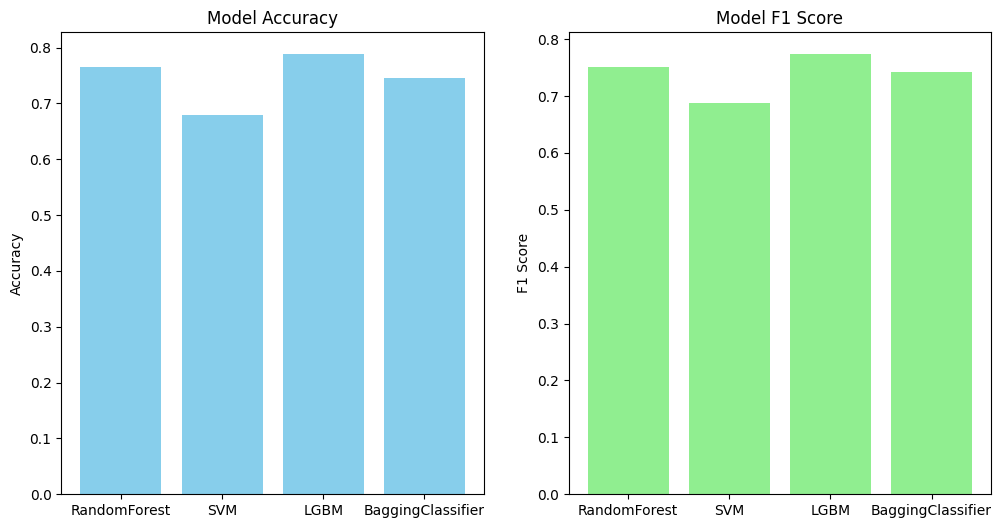

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
Accuracy: 0.697
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.81      0.81      0.81      1583
           3       0.30      0.29      0.30       347
           4       0.03      0.04      0.03        54

    accuracy                           0.70      2000
   macro avg       0.29      0.29      0.29      2000
weighted avg       0.70      0.70      0.70      2000



['NN.joblib']

In [ ]:
import pandas as pd
import polars as pl
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import  SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

df = pl.read_csv('US_Accidents_March23.csv')

numeric_features = ["Start_Lat", "Start_Lng", "Distance(mi)", "Temperature(F)", "Wind_Chill(F)",
                    "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
                    "Precipitation(in)", "Duration"]

categorical_features = ["Wind_Direction", "Crossing", "Junction", "Traffic_Signal", "Sunrise_Sunset",
                        "TimeofDay", "Season", "Day_Type", "Clear", "Cloud", "Rain", "Heavy_Rain",
                        "Snow", "Heavy_Snow", "Fog", "Dusty", "Windy", "Ash"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'transform_pipeline.joblib')

X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'LGBM': lgb.LGBMClassifier(),
    'BaggingClassifier': BaggingClassifier()
}

hyperparameters = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LGBM': {'num_leaves': [31, 50], 'learning_rate': [0.01, 0.1]},
    'BaggingClassifier': {'n_estimators': [10, 50], 'max_samples': [0.5, 1.0]}
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, hyperparameters[model_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[model_name] = {
        'model': best_model,
        'accuracy': accuracy,
        'f1_score': f1
    }

    model_filename = f'{model_name}.joblib'
    joblib.dump(best_model, model_filename)

    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
f1_scores = [results[model]['f1_score'] for model in model_names]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='lightgreen')
plt.title('Model F1 Score')
plt.ylabel('F1 Score')

plt.show()

mlp = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100, 50), (100, 30, 10)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': ['auto', 32],
    'max_iter': [300, 400]
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

print(f"Best hyperparameters: {grid_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

model_filename = 'NN.joblib'
joblib.dump(best_model, model_filename)


In [104]:
# models=['RandomForest','SVM','LGBM','Baggingclassifier']
# Hyperparameters dictionary={}
#train each model for respective hyperparameters and plot the accuracy and F1 scores and ROC AUC curve for each of them
from sklearn.svm import SVC
import joblib
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

In [106]:
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  
    'LGBM': lgb.LGBMClassifier(),
    'BaggingClassifier': BaggingClassifier()
}
hyperparameters = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LGBM': {'num_leaves': [31, 50], 'learning_rate': [0.01, 0.1]},
    'BaggingClassifier': {'n_estimators': [10, 50], 'max_samples': [0.5, 1.0]}
}
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, hyperparameters[model_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_sel)
    y_proba = best_model.predict_proba(X_test_sel)[:, 1]

    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
#     roc_auc = roc_auc_score(y_test, y_proba,multi_class='ovr')

    results[model_name] = {
        'model': best_model,
        'accuracy': accuracy,
        'f1_score': f1
#         'roc_auc': roc_auc
    }
    #save the model
    model_filename = f'{model_name}.joblib'
    joblib.dump(best_model, model_filename)

    
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    
#     fpr, tpr, _ = roc_curve(y_test, y_proba)
#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curves for all models
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves')
# plt.legend()
# plt.show()


Training RandomForest...

Classification Report for RandomForest:

              precision    recall  f1-score   support

           1       0.07      0.12      0.09        16
           2       0.85      0.86      0.85      1583
           3       0.44      0.42      0.43       347
           4       0.09      0.07      0.08        54

    accuracy                           0.75      2000
   macro avg       0.36      0.37      0.36      2000
weighted avg       0.75      0.75      0.75      2000

Training SVM...

Classification Report for SVM:

              precision    recall  f1-score   support

           1       0.02      0.62      0.05        16
           2       0.91      0.38      0.53      1583
           3       0.34      0.52      0.41       347
           4       0.07      0.50      0.12        54

    accuracy                           0.41      2000
   macro avg       0.34      0.51      0.28      2000
weighted avg       0.78      0.41      0.50      2000

Training LGBM.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 20550, number of used features: 12
[LightGBM] [Info] Start training from score -1.386197
[LightGBM] [Info] Start training from score -1.386392
[LightGBM] [Info] Start training from score -1.386197
[LightGBM] [Info] Start training from score -1.386392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 20551, number of used features: 12
[LightGBM] [Info] Start training from score -1.386440
[LightGBM] [Info] Start training from score -1.386246
[LightGBM] [Info] Start training f

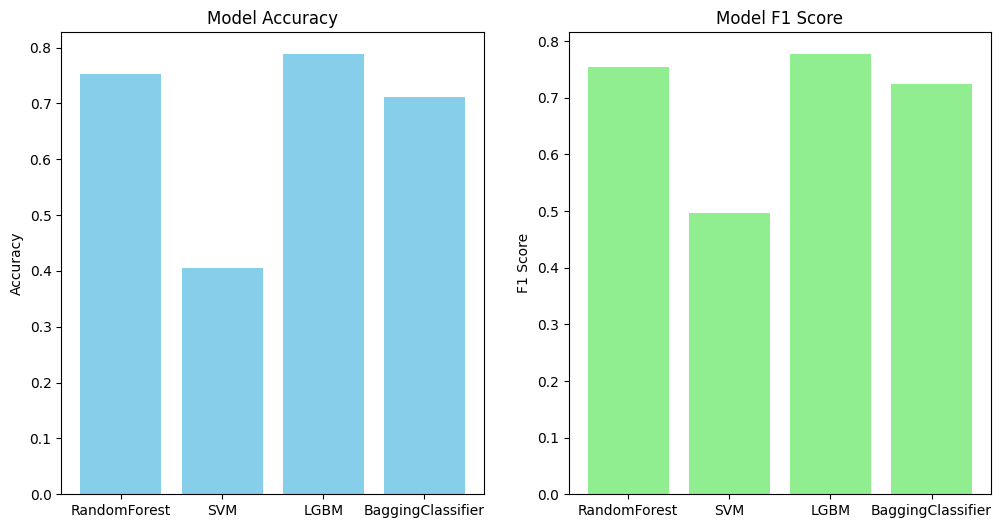

In [98]:
# Plot Accuracy and F1 scores
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
f1_scores = [results[model]['f1_score'] for model in model_names]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='lightgreen')
plt.title('Model F1 Score')
plt.ylabel('F1 Score')

plt.show()


In [ ]:
#We compare this with earlier reports of Random Forests we can see prescision has improved a bit but is still abysmal 


In [102]:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [ (100, 50), (100, 30, 10)],  # Different layer architectures
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam'],  # Solvers for optimization
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedules
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'batch_size': ['auto', 32],  # Batch sizes
    'max_iter': [300, 400]  # Max iterations for training
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test_sel)


print(f"Best hyperparameters: {grid_search.best_params_}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and 

/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and 

/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and 

/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and 

/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rahulbharti/Desktop/ML_project/ML/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and 

Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
Accuracy: 0.5865
Classification Report:
               precision    recall  f1-score   support

           1       0.04      0.12      0.06        16
           2       0.89      0.58      0.70      1583
           3       0.32      0.71      0.44       347
           4       0.09      0.28      0.13        54

    accuracy                           0.59      2000
   macro avg       0.34      0.42      0.33      2000
weighted avg       0.77      0.59      0.64      2000



In [105]:
#Deployment
#first we save our models as joblib files 
model_filename = f'NN.joblib'
joblib.dump(best_model, model_filename) 

['NN.joblib']